# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import pandas 

training_file = "/home/ryan/Documents/traffic-signs-data/train.p"
validation_file = "/home/ryan/Documents/traffic-signs-data/valid.p"
testing_file = "/home/ryan/Documents/traffic-signs-data/test.p"

sign_names = pandas.read_csv('./signnames.csv').values

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

assert(len(X_train) == len(y_train))
assert(len(X_valid) == len(y_valid))
assert(len(X_test) == len(y_test))

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = len(X_train)
n_validation = len(X_valid)
n_test = len(X_test)

image_shape = X_train[0].shape
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

3


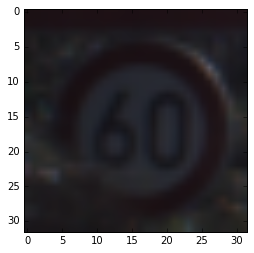

In [3]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

i = random.randint(0, len(X_train))
image = X_train[i].squeeze()

plt.figure()
plt.imshow(image, cmap='gray')
print(y_train[i])

My exploration of the data was just to poke around at random images. I can see they're dark and somewhat blurry. Not ideal images, in my opinion, but presumably they'll work. 

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle
import numpy as np

X_train, y_train = shuffle(X_train, y_train)
X_train = np.dot(X_train,[0.299, 0.587, 0.114])[...,None]
X_train = [ ((x - 128) / 128) for x in X_train]

X_valid = np.dot(X_valid,[0.299, 0.587, 0.114])[...,None]
X_valid = [ ((x - 128) / 128) for x in X_valid]

X_test = np.dot(X_test,[0.299, 0.587, 0.114])[...,None]
X_test = [ ((x - 128) / 128) for x in X_test]

I didn't do anything unusual with the training set. The recommendation of converting to grayscale and taking the mean of the image turned out largely sufficient to have greater than 90% accuracy for the sign identification. 

### Model Architecture

In [5]:
import tensorflow as tf
EPOCHS = 50
BATCH_SIZE = 128

In [6]:
# Layer 1
def lay1(x, mu, sigma):
    # Input = 32x32x3;
    conv_w = tf.Variable(tf.truncated_normal(shape=(5,5,1,6), mean=mu, stddev=sigma))
    conv_b = tf.Variable(tf.zeros(6))
    conv = tf.nn.conv2d(x, conv_w, strides=[1,1,1,1], padding='VALID') + conv_b
    # Activation
    conv = tf.nn.relu(conv)
    return tf.nn.max_pool(conv, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

In [7]:
def lay2(x, mu, sigma):
    conv_w = tf.Variable(tf.truncated_normal(shape=(5,5,6,16), mean=mu, stddev=sigma))
    conv_b = tf.Variable(tf.zeros(16))
    conv = tf.nn.conv2d(x, conv_w, strides=[1,1,1,1], padding='VALID') + conv_b
    # Activation
    conv = tf.nn.relu(conv)
    # Pooling
    return tf.nn.max_pool(conv, ksize=[1,2,2,1], strides=[1,2,2,1], padding='VALID')

In [8]:
def lay3(x, mu, sigma):
    fc_w = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev=sigma))
    fc_b = tf.Variable(tf.zeros(120))
    fc = tf.matmul(x, fc_w) + fc_b
    # Activation
    return tf.nn.relu(fc)

In [9]:
def lay4(x, mu, sigma):
    fc_w = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc_b = tf.Variable(tf.zeros(84))
    fc = tf.matmul(x, fc_w) + fc_b
    return tf.nn.relu(fc)

In [10]:
def lay5(x, mu, sigma):
    fc_w = tf.Variable(tf.truncated_normal(shape=(84, 43), mean=mu, stddev=sigma))
    fc_b = tf.Variable(tf.zeros(43))
    return tf.matmul(x, fc_w) + fc_b

In [11]:
from tensorflow.contrib.layers import flatten

def net(x): 
    mu = 0
    sigma = .1
    
    conv = lay1(x, mu, sigma)
    conv = lay2(conv, mu, sigma)
    conv = flatten(conv)
    fc = lay3(conv, mu, sigma)
    fc = lay4(fc, mu, sigma)
    # Logits
    return lay5(fc, mu, sigma)
    

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [12]:
rate = 0.001
# rate = 0.0005

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
logits = net(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [13]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training\n")
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {}".format(i + 1))
        print("Validation Accuracy = {:.3f}\n".format(validation_accuracy))
        
    saver.save(sess, './lenet')
    print('Model Saved')

Training

EPOCH 1
Validation Accuracy = 0.778

EPOCH 2
Validation Accuracy = 0.852

EPOCH 3
Validation Accuracy = 0.883

EPOCH 4
Validation Accuracy = 0.886

EPOCH 5
Validation Accuracy = 0.882

EPOCH 6
Validation Accuracy = 0.904

EPOCH 7
Validation Accuracy = 0.900

EPOCH 8
Validation Accuracy = 0.907

EPOCH 9
Validation Accuracy = 0.905

EPOCH 10
Validation Accuracy = 0.897

EPOCH 11
Validation Accuracy = 0.922

EPOCH 12
Validation Accuracy = 0.911

EPOCH 13
Validation Accuracy = 0.917

EPOCH 14
Validation Accuracy = 0.913

EPOCH 15
Validation Accuracy = 0.919

EPOCH 16
Validation Accuracy = 0.918

EPOCH 17
Validation Accuracy = 0.920

EPOCH 18
Validation Accuracy = 0.917

EPOCH 19
Validation Accuracy = 0.926

EPOCH 20
Validation Accuracy = 0.919

EPOCH 21
Validation Accuracy = 0.908

EPOCH 22
Validation Accuracy = 0.912

EPOCH 23
Validation Accuracy = 0.935

EPOCH 24
Validation Accuracy = 0.934

EPOCH 25
Validation Accuracy = 0.924

EPOCH 26
Validation Accuracy = 0.919

EPOCH 27
Va

In [14]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy: {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy: 0.933


The validation set indicates the model is ~93% accurate. This tends to vary depending on the shuffled data set. As are others that I've pointed out further down. 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 1)
(32, 32, 1)
(32, 32, 1)
(32, 32, 1)


/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ryan/.conda/envs/carnd-term1/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be ch

(32, 32, 1)


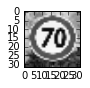

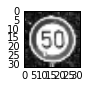

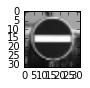

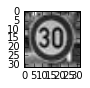

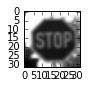

In [15]:
from imageio import imread
from skimage.transform import resize
import glob
import matplotlib.pyplot as plt

images = []

for i, img in enumerate(glob.glob('./traffic-signs-data/found_images/*.jpg')):
    image = resize(imread(img), (32, 32))
    images.append(image)
    
dataset = images
dataset = np.dot(dataset,[0.299, 0.587, 0.114])[...,None]
# dataset = [ ((x - 128) / 128) for x in dataset]
dataset = np.asarray(dataset)

for data in dataset:
    plt.figure(figsize=(1,1))
    print(data.shape)
    plt.imshow(data.squeeze(), cmap='gray')

### Predict the Sign Type for Each Image

### Analyze Performance

In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

dataset_labels = [2, 14, 4, 1, 17]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    output = evaluate(dataset, dataset_labels)
    print("Accuracy: {:.3f}".format(output))
    
    

INFO:tensorflow:Restoring parameters from ./lenet
Accuracy: 0.200


This seems to indicate that the model is 20% accurate. But something is wrong here (other than the model), but I'm unsure of what. Later on, the top_k shows the correct choices for all but one. This number here should be closer to 80%. This also tends to vary depending on the shuffled training set. 

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

INFO:tensorflow:Restoring parameters from ./lenet
TopKV2(values=array([[  9.93900895e-01,   5.67988120e-03,   4.19165182e-04,
          6.44549303e-08,   5.83513862e-11],
       [  1.00000000e+00,   8.60122945e-11,   4.82646041e-12,
          1.17120929e-12,   2.61268657e-18],
       [  1.00000000e+00,   1.58880336e-17,   5.40649488e-19,
          6.69573625e-21,   9.66059411e-22],
       [  9.99999881e-01,   6.69159235e-08,   1.40465790e-08,
          7.63517461e-12,   1.82404157e-12],
       [  8.88734162e-01,   1.01241305e-01,   4.86544380e-03,
          3.66618391e-03,   7.25222460e-04]], dtype=float32), indices=array([[ 0,  1,  4, 37, 31],
       [ 2, 31,  5,  1,  7],
       [17,  0, 40, 12,  1],
       [ 1,  2,  0, 40, 31],
       [14, 17, 38,  9, 34]], dtype=int32))


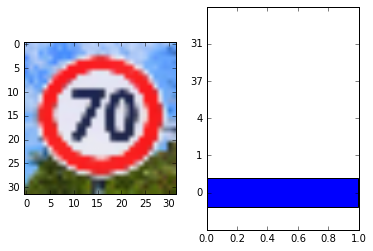

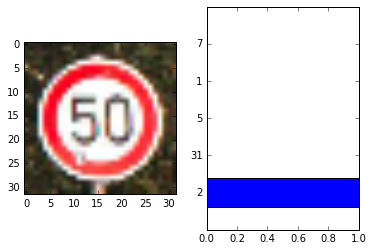

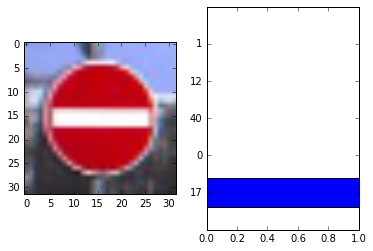

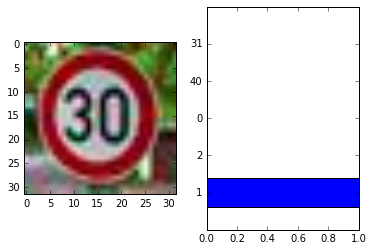

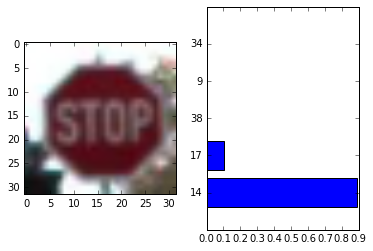

In [18]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

TOP_K = 5

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=TOP_K)

with tf.Session() as sess:
    
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_softmax_logits = sess.run(softmax_logits, feed_dict={x: dataset})
    test_top_k = sess.run(top_k, feed_dict={x: dataset})
    
    for i in range(len(dataset)):
        fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, sharex=False)
        ax1.imshow(images[i])
        ax2.barh(range(TOP_K), test_top_k.values[i], align='center')
        ax2.set_yticks(range(TOP_K))
        ax2.set_yticklabels(test_top_k.indices[i])
        
    print(test_top_k)
    

All but the 70km/h sign were correctly identified. But the correct choice was in the top 3, at least. I've found that I have different results depending on the shuffled training data. On a previous run of this notebook, all 5 were correctly identified, but the validation set had worse performance. There seems to be a trade-off between the two. It's possible the model is slightly overfitted to the training data in this case, while on other shuffle sets it is underfitted. 

All said and done, I think the model is reasonably accurate. However, I dislike the noticable variance depending on the shuffled datasets. It's possible that increasing EPOCH would start to even this out accross multiple shuffled sets. Combining this with a decrease in the learning rate should provide a more smooth model between shuffled sets as well. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.